In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importlib import reload

In [202]:
import lnPi
reload(lnPi)

<module 'lnPi' from '/Users/wpk/Documents/python/lnPi/__init__.py'>

In [203]:
lnpi_ref = lnPi.lnPi_phases.from_file('./nahs_asym_mix.07_07_07.r1.lnpi_o.dat',mu=[0.5,0.5],fill_value=np.nan,ZeroMax=True,num_phases_max=2,beta=1.0,
                                     build_kwargs=dict(num_phases_max=5),ftag_phases=lnPi.tag_phases_binary) 

In [464]:
import lnPi.core
reload(lnPi.core)

<module 'lnPi.core' from '/Users/wpk/Documents/python/lnPi/core.py'>

In [465]:
b2 = lnPi.core.lnPi(data=b.data, mask = b.mask, **b._optinfo)

In [466]:
d = [b2.reweight(np.random.rand(2)) for x in range(5)]

In [218]:
(b2.pi_norm * b2.ncoords).sum(b2.dims_Nqq)

<xarray.DataArray (component: 2)>
array([2.480526e+02, 1.921080e-02])
Coordinates:
    mu_0     float64 0.5
    mu_1     float64 0.5
    beta     float64 1.0
Dimensions without coordinates: component

In [212]:
(b2.ncoords - b2.Nave)**2

<xarray.DataArray (component: 2, N_0: 255, N_1: 255)>
array([[[6.153011e+04, 6.153011e+04, ..., 6.153011e+04, 6.153011e+04],
        [6.103500e+04, 6.103500e+04, ..., 6.103500e+04, 6.103500e+04],
        ...,
        [2.447644e+01, 2.447644e+01, ..., 2.447644e+01, 2.447644e+01],
        [3.537118e+01, 3.537118e+01, ..., 3.537118e+01, 3.537118e+01]],

       [[3.690549e-04, 9.619475e-01, ..., 6.399928e+04, 6.450624e+04],
        [3.690549e-04, 9.619475e-01, ..., 6.399928e+04, 6.450624e+04],
        ...,
        [3.690549e-04, 9.619475e-01, ..., 6.399928e+04, 6.450624e+04],
        [3.690549e-04, 9.619475e-01, ..., 6.399928e+04, 6.450624e+04]]])
Coordinates:
    mu_0     float64 0.5
    mu_1     float64 0.5
    beta     float64 1.0
Dimensions without coordinates: component, N_0, N_1

In [209]:
(b2.pi_norm * b2.ncoords).sum(b2._xr_N_dims)

<xarray.DataArray (component: 2)>
array([2.480526e+02, 1.921080e-02])
Coordinates:
    mu_0     float64 0.5
    mu_1     float64 0.5
    beta     float64 1.0
Dimensions without coordinates: component

In [ ]:
np.indices

In [99]:
b2.ncoords

AttributeError: module 'numpy' has no attribute 'indicies'

In [45]:
%%timeit -n 10

(255, 255)

In [83]:
%%timeit -n 10
b._clear_cache()
b.Nave

2.38 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [88]:
#%%timeit -n 10
b._clear_cache()
pi_norm = xr.DataArray(b.pi_norm.filled(np.nan), dims=['N_0','N_1'], coords=b._xr_coords)

coords = xr.DataArray(b.coords, dims=['component','N_0','N_1'], coords=b._xr_coords)

(coords * pi_norm).sum(['N_0','N_1'])

<xarray.DataArray (component: 2)>
array([2.480526e+02, 1.921080e-02])
Coordinates:
    mu_0     float64 0.5
    mu_1     float64 0.5
    beta     float64 1.0
Dimensions without coordinates: component

In [55]:
(pi_norm * pi_norm.N_0).sum(['N_0','N_1'])

<xarray.DataArray ()>
array(248.052633)

In [39]:
b.Nave

<xarray.DataArray 'Nave' (component: 2)>
array([2.480526e+02, 1.921080e-02])
Coordinates:
    mu_0     float64 0.5
    mu_1     float64 0.5
    beta     float64 1.0
Dimensions without coordinates: component

In [7]:
def get_spin_bin(ref,mu_in,x,spin_kwargs=None,bin_kwargs=None):
    
    if spin_kwargs is None: spin_kwargs={}
    if bin_kwargs is None: bin_kwargs = {}
    
    #initial estimate
    C = lnPi.lnPi_collection.from_mu(ref,mu_in,x)
    
    C.get_spinodals(**spin_kwargs)
    C.get_binodals(**bin_kwargs)
    
    return C
            

In [8]:
import tqdm

In [9]:
L=[]
for mu2 in tqdm.tqdm(np.arange(-4,4,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10,10,2),spin_kwargs=dict(ntry=40,nmax=40))
    except:
        print('error at mu2',mu2)
        break
    L.append(C)

 70%|███████   | 28/40 [00:29<00:12,  1.08s/it]/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)
/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)
/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)
/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)
 75%|███████▌  | 30/40 [00:31<00:10,  1.09s/it]/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)
/Users/wpk/Documents/python/lnPi/__init__.py:1667: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f

In [10]:
L2=[]
for mu2 in tqdm.tqdm(np.arange(-5,-4,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10,10,2),spin_kwargs=dict(nmax=40,ntry=40))
    except:
        print('error at mu2',mu2)
        break
    L2.append(C)

100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


In [11]:
LL = L2 + L

In [12]:
!rm bulk.h5

rm: bulk.h5: No such file or directory


In [13]:
#save L to file
import h5py
F = h5py.File('bulk.h5')

lnpi_ref.to_hdf(F,'lnpi_ref',overwrite=True)
collection_list = []
for i,x in enumerate(LL):
    key = 'collection_%i'%i
    collection_list.append(key)
    x.to_hdf(F,key,ref=None,overwrite=True)
F.create_dataset('collection_list',data=np.array(collection_list,dtype='S'))
F.close()

In [14]:
#load file to lst
f = h5py.File('bulk.h5')
ref = lnPi.lnPi_phases.from_hdf(f,'lnpi_ref')

lst = []
for k in f['collection_list']:
    lst.append(lnPi.lnPi_collection.from_hdf(f,k,ref=ref))

f.close()

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [21]:
p.Omega_phase().sel(phase=0)

<xarray.DataArray 'Omega' ()>
array(-465.4269)
Coordinates:
    phase    int64 0
    mu_0     float64 -4.695
    mu_1     float64 -4.4
    beta     float64 1.0

In [23]:
p.molfrac_phase.sel(phase=i, component=0)

<xarray.DataArray 'Nave' ()>
array(0.471658)
Coordinates:
    phase    int64 0
    mu_0     float64 -4.695
    mu_1     float64 -4.4
    beta     float64 1.0

In [27]:
l = []
for x in lst:
    
    d = {}

    spin = x.spinodals
    if spin[0] is None:
        #no spin
        pass 
    else:
        #spin
        for i,pp in enumerate(spin):
            p = pp.merge_phases(efac=0.8)
            for j in range(2):
                d['mu_spin_%i_comp_%i'%(i,j)] = p.mu[j]
                
            d['omega_spin_%i'%(i)] = p.Omega_phase().sel(phase=i).values
                
            d['molfrac_spin_%i_comp_0'%i] = p.molfrac_phase.sel(phase=i, component=0).values
            
        
    bino = x.binodals[0]
    if bino is None:
        pass
    else:
        #no bin
        p = bino.merge_phases(efac=0.8)

        for i in range(2):
            for j in range(2):
                d['mu_bin_%i_comp_%i'%(i,j)] = p.mu[j]

            d['omega_bin_%i'%(i)] = p.Omega_phase().sel(phase=i).values
            d['molfrac_bin_%i_comp_0'%i] = p.molfrac_phase.sel(phase=i, component=0).values
    l.append(d)
    
df = pd.DataFrame(l)

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/numpy/ma/core.py:1018: RuntimeWarning: overflow encountered in multiply
  result = self.f

In [29]:
df.to_hdf('bulk.h5','df')

/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['molfrac_bin_0_comp_0', 'molfrac_bin_1_comp_0', 'molfrac_spin_0_comp_0', 'molfrac_spin_1_comp_0', 'omega_bin_0', 'omega_bin_1', 'omega_spin_0', 'omega_spin_1']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [30]:
!ls -hl bulk.h5

-rw-r--r--  1 wpk  42033    15M Apr 30 11:20 bulk.h5


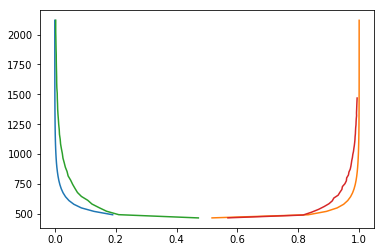

In [31]:
a=df
plt.plot(a.molfrac_bin_0_comp_0,-a.omega_bin_0)
plt.plot(a.molfrac_bin_1_comp_0,-a.omega_bin_1)

plt.plot(a.molfrac_spin_0_comp_0,-a.omega_spin_0)
plt.plot(a.molfrac_spin_1_comp_0,-a.omega_spin_1)


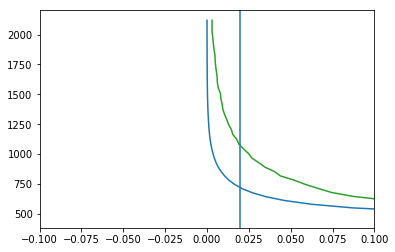

In [32]:
fig,ax=plt.subplots()
plt.plot(df.molfrac_bin_0_comp_0,-df.omega_bin_0)
plt.plot(df.molfrac_bin_1_comp_0,-df.omega_bin_1)

plt.plot(df.molfrac_spin_0_comp_0,-df.omega_spin_0)
plt.plot(df.molfrac_spin_1_comp_0,-df.omega_spin_1)

ax.set_xlim(-0.1,0.1)

ax.axvline(x=0.02)


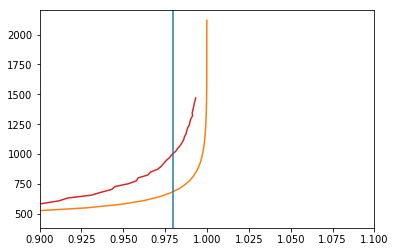

In [33]:
fig,ax=plt.subplots()
plt.plot(df.molfrac_bin_0_comp_0,-df.omega_bin_0)
plt.plot(df.molfrac_bin_1_comp_0,-df.omega_bin_1)

plt.plot(df.molfrac_spin_0_comp_0,-df.omega_spin_0)
plt.plot(df.molfrac_spin_1_comp_0,-df.omega_spin_1)

ax.set_xlim(.9,1.1)

ax.axvline(x=0.98)


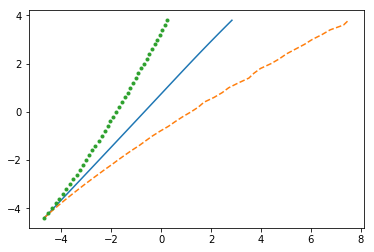

In [34]:

plt.plot(df.mu_bin_0_comp_0,df.mu_bin_0_comp_1)
plt.plot(df.mu_spin_0_comp_0,df.mu_spin_0_comp_1,'--')
plt.plot(df.mu_spin_1_comp_0,df.mu_spin_1_comp_1,'.')

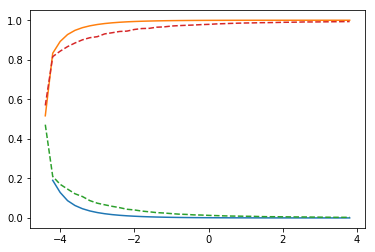

In [35]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

(-0.05, 0.1)

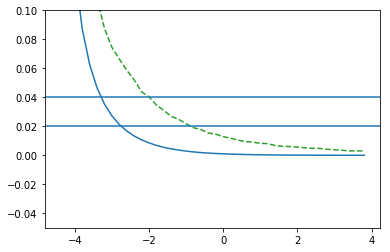

In [36]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

ax = plt.gca()
ax.axhline(y=0.02)
ax.axhline(y=0.04)
ax.set_ylim(-.05,.1)